**TASK 1 : BIG DATA JOB FAMILIES IDENTIFICATION**

In [ ]:
!git clone https://github.com/Parthasaradhireddy17/PDS_Project


fatal: destination path 'PDS_Project' already exists and is not an empty directory.


In [ ]:
import zipfile
import os

# Replace 'your_zip_file.zip' with the actual name of your zip file
zip_file_path = '/content/PDS_Project/Dataset/Datasets.zip'

# Replace 'output_directory' with the desired directory to extract the contents
output_directory = '/content/Dataset/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

# List the contents of the output directory
extracted_files = os.listdir(output_directory)
print("Extracted files:", extracted_files)


Extracted files: ['Datasets', '__MACOSX']


In [ ]:
import pandas as pd
#Load the dataset
df=pd.read_csv('/content/Dataset/Datasets/data dice.com.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20637 entries, 0 to 20636
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Role             20637 non-null  object
 1   Company          20635 non-null  object
 2   Location         20536 non-null  object
 3   Job_Description  15293 non-null  object
dtypes: object(4)
memory usage: 645.0+ KB


In [ ]:
df.Role.nunique() # 7185 got unique job roles

7185

In [ ]:
df.Role.value_counts() # role wise count of the jobs

Data Engineer                                                      802
Data Scientist                                                     605
Apple Media Products (AMP)- Big Data Analyst, Analytics Engi...    348
Data Analyst                                                       317
Analyst - Loyalty & Customer Analytics                             276
                                                                  ... 
Sr.TABLEAU DEVELOPER                                                 1
Java  AWS Lead Software Engineer    Columbus   OH                    1
Tomahawk Sr. Systems Engineer                                        1
ADAS Collison Avoidance Software Architect                           1
Program Research Analyst – Sustainable Cities and Transport          1
Name: Role, Length: 7185, dtype: int64

In [ ]:
df['Role']=df['Role'].str.replace('[\'\,\_\/\-\(\)\|\||]','')

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Load the NLTK English stopwords
stop_words = set(stopwords.words('english')+['Sr.','Senior','Lead'])

# Define a function to remove stop words from a given text
def remove_stop_words(text):
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Filter out stop words
    return ' '.join(filtered_tokens)  # Join the filtered tokens back into a string

# Apply the remove_stop_words function to the text_column and store the results in a new column
df['Role'] = df['Role'].apply(remove_stop_words)

# Display the resulting DataFrame with stop words removed
print(df['Role'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                        Big Data Engineer
1                                            Data Engineer
2                                        Big Data Engineer
3                                        Big Data Engineer
4                                Big Data Hadoop Developer
                               ...                        
20632            Learning IntegrationAnalystSenior Analyst
20633                                     Business Analyst
20634               Research Analyst Central Events Hybrid
20635    Program Research Analyst – Sustainable Cities ...
20636                                         Data Analyst
Name: Role, Length: 20637, dtype: object


In [ ]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# Concatenate all job titles into a single string
all_titles = ' '.join(df['Role'].values)

# Tokenize the job titles into individual words
tokens = all_titles.split()

# Generate all possible bigrams from the tokens
bigrams =  ngrams(tokens,2)
trigrams = ngrams(tokens,3)

# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Sort the bigrams by their frequency count in descending order
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)



In [ ]:
# Display the sorted list of bigrams and their counts
for bigram, count in sorted_bigrams:
    if count > 100 :
        print('Bigram:', bigram, 'Count:', count)


Bigram: ('Data', 'Engineer') Count: 2318
Bigram: ('Data', 'Scientist') Count: 1649
Bigram: ('Big', 'Data') Count: 1314
Bigram: ('Software', 'Engineer') Count: 1235
Bigram: ('Data', 'Analyst') Count: 1184
Bigram: ('Engineer', 'Data') Count: 1118
Bigram: ('Analyst', 'Data') Count: 641
Bigram: ('Machine', 'Learning') Count: 570
Bigram: ('Engineer', 'Big') Count: 482
Bigram: ('Data', 'Analytics') Count: 470
Bigram: ('Business', 'Analyst') Count: 445
Bigram: ('Data', 'Science') Count: 419
Bigram: ('Data', 'Architect') Count: 383
Bigram: ('Analyst', 'Analytics') Count: 357
Bigram: ('Apple', 'Media') Count: 354
Bigram: ('Media', 'Products') Count: 354
Bigram: ('Products', 'AMP') Count: 354
Bigram: ('Engi', '...') Count: 351
Bigram: ('AMP', 'Big') Count: 348
Bigram: ('Analytics', 'Engi') Count: 348
Bigram: ('Scientist', 'Data') Count: 337
Bigram: ('Learning', 'Engineer') Count: 313
Bigram: ('&', 'Customer') Count: 282
Bigram: ('Customer', 'Analytics') Count: 277
Bigram: ('Analyst', 'Loyalty') 

In [ ]:
for trigram, count in sorted_trigrams:
    if count > 50 :
        print('Trigram:', trigram, 'Count:', count)

Trigram: ('Data', 'Engineer', 'Data') Count: 765
Trigram: ('Engineer', 'Data', 'Engineer') Count: 613
Trigram: ('Engineer', 'Big', 'Data') Count: 474
Trigram: ('Big', 'Data', 'Engineer') Count: 449
Trigram: ('Data', 'Engineer', 'Big') Count: 408
Trigram: ('Big', 'Data', 'Analyst') Count: 365
Trigram: ('Apple', 'Media', 'Products') Count: 354
Trigram: ('Media', 'Products', 'AMP') Count: 354
Trigram: ('Data', 'Analyst', 'Analytics') Count: 351
Trigram: ('Products', 'AMP', 'Big') Count: 348
Trigram: ('AMP', 'Big', 'Data') Count: 348
Trigram: ('Analyst', 'Analytics', 'Engi') Count: 348
Trigram: ('Analytics', 'Engi', '...') Count: 348
Trigram: ('Data', 'Scientist', 'Data') Count: 309
Trigram: ('Machine', 'Learning', 'Engineer') Count: 309
Trigram: ('Analyst', 'Loyalty', '&') Count: 276
Trigram: ('Loyalty', '&', 'Customer') Count: 276
Trigram: ('&', 'Customer', 'Analytics') Count: 276
Trigram: ('Data', 'Analyst', 'Data') Count: 274
Trigram: ('Analyst', 'Data', 'Analyst') Count: 244
Trigram: 

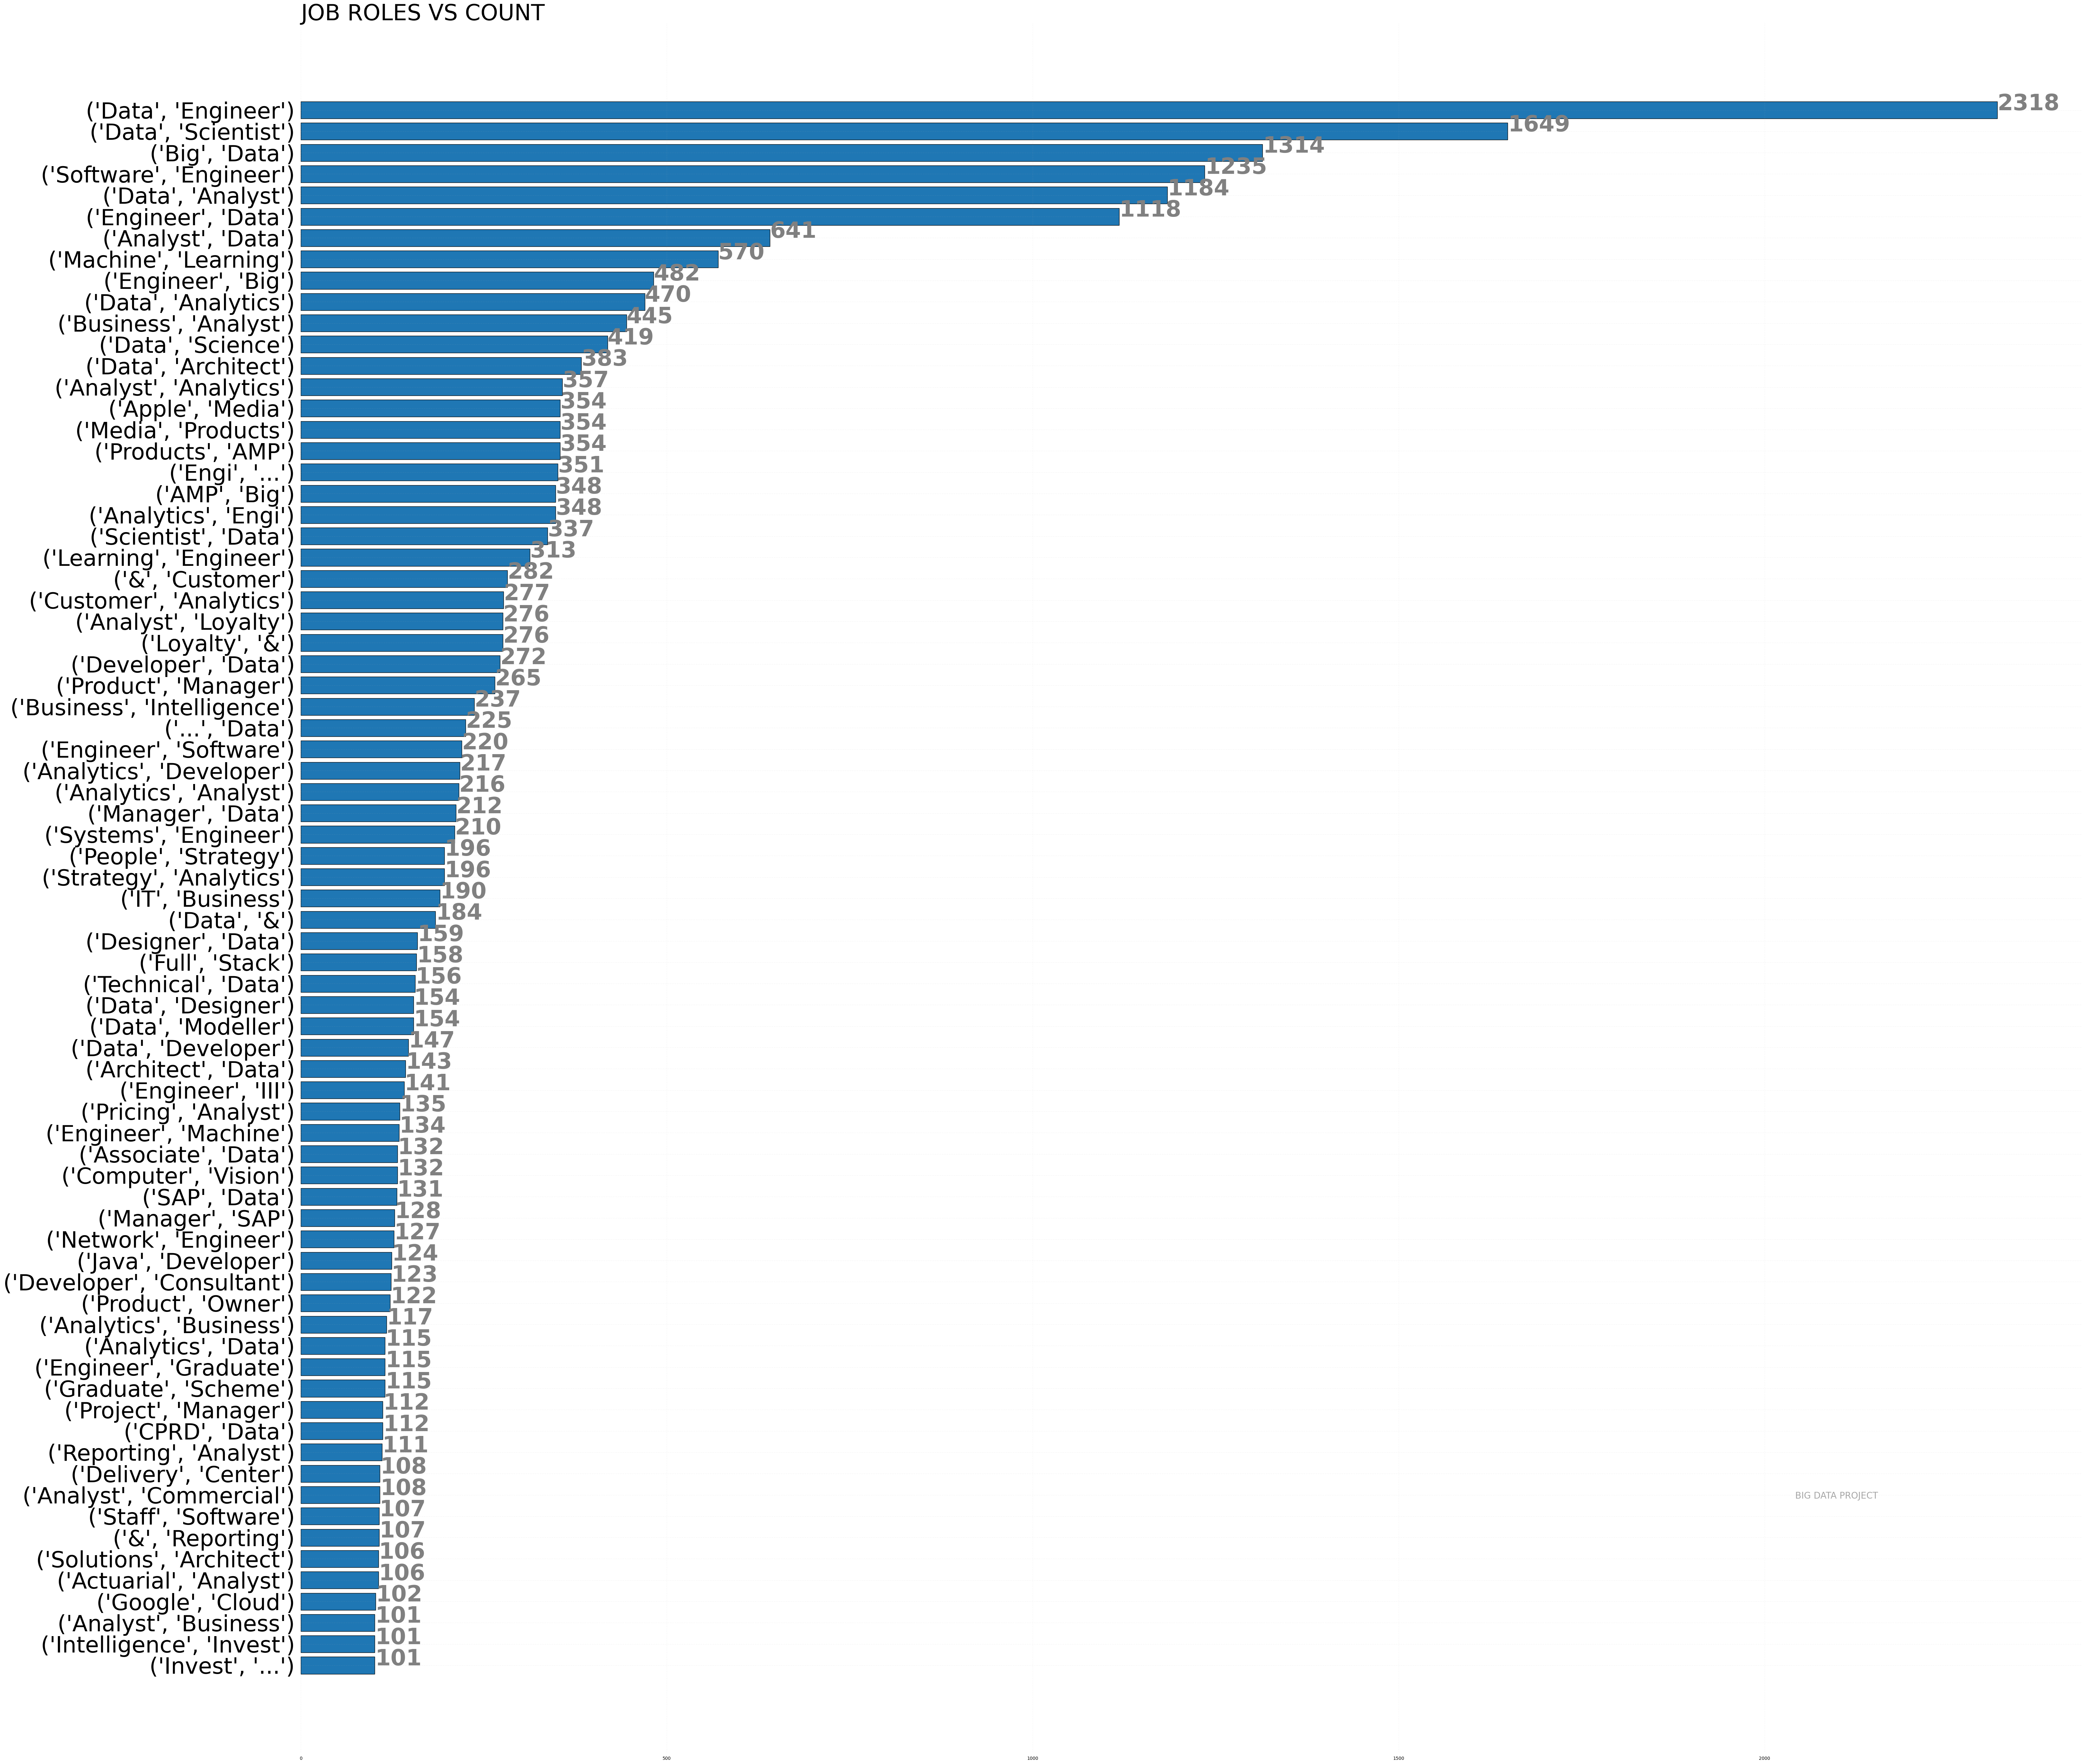

In [ ]:
import matplotlib.pyplot as plt

jobs = []
counts = []

for bigram, count in sorted_bigrams:
    if count > 100 and bigram not in jobs:
        jobs.append(str(bigram))
        counts.append(count)

# Figure Size
fig, ax = plt.subplots(figsize=(65, 55))

# Horizontal Bar Plot with added space between bars
bars = ax.barh(jobs, counts, height=0.8, edgecolor='black')  # Adjust bar height and edge color

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.xaxis.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2)
ax.yaxis.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2,
             str(round(bar.get_width(), 2)),
             fontsize=50, fontweight='bold', color='grey')  # Adjust font size

# Rotate y-axis labels for better visibility
ax.set_yticklabels(jobs, rotation=0, ha='right', fontsize=50)  # Increase font size

# Add Plot Title
ax.set_title('JOB ROLES VS COUNT', loc='left', fontsize=50)  # Increase title font size

# Add Text watermark
fig.text(0.9, 0.15, 'BIG DATA PROJECT', fontsize=20,
         color='grey', ha='right', va='bottom', alpha=0.7)

# Automatically adjust subplot parameters to prevent overlapping
plt.tight_layout()

# Show Plot
plt.show()


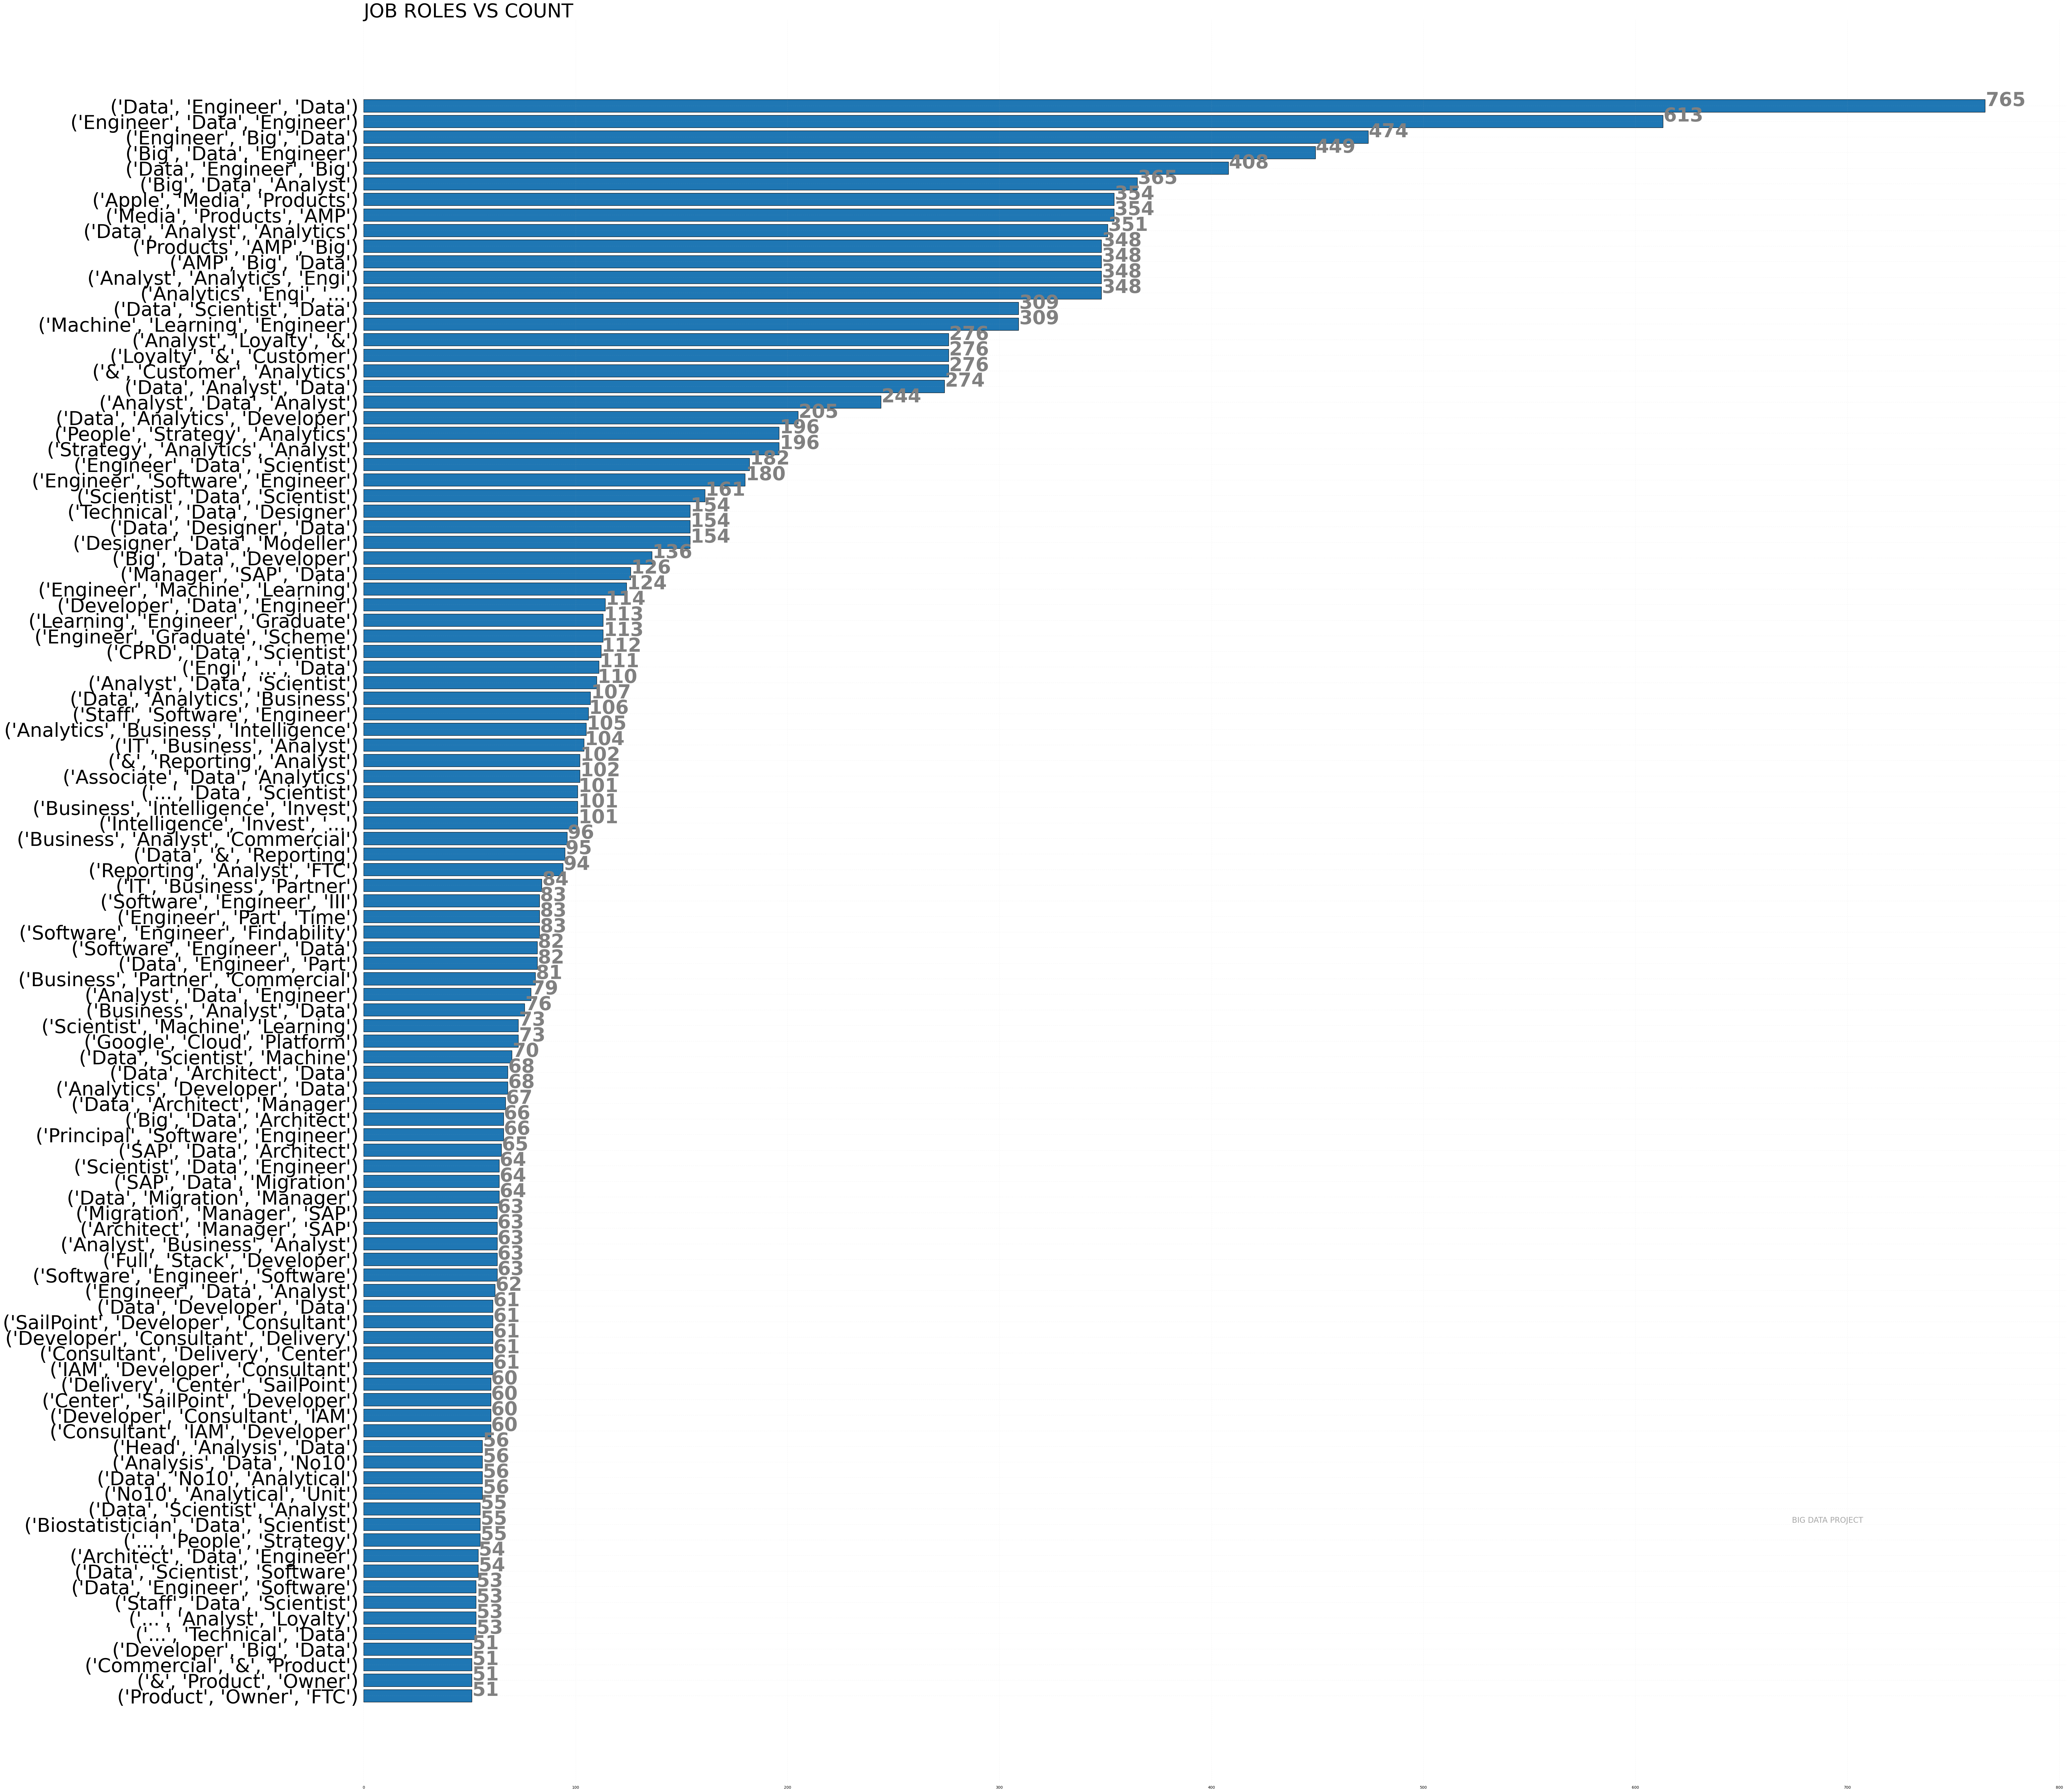

In [ ]:
import matplotlib.pyplot as plt

jobs=[]
counts=[]

for trigram, count in sorted_trigrams:
    if count>50 and trigram not in jobs:
        #print('Bigram:', bigram, 'Count:', count)
        jobs.append(str(trigram))
        counts.append(count)

# Figure Size
fig, ax = plt.subplots(figsize=(75, 65))

# Horizontal Bar Plot with added space between bars
bars = ax.barh(jobs, counts, height=0.8, edgecolor='black')  # Adjust bar height and edge color

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.xaxis.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2)
ax.yaxis.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2,
             str(round(bar.get_width(), 2)),
             fontsize=50, fontweight='bold', color='grey')  # Adjust font size

# Rotate y-axis labels for better visibility
ax.set_yticklabels(jobs, rotation=0, ha='right', fontsize=50)  # Increase font size

# Add Plot Title
ax.set_title('JOB ROLES VS COUNT', loc='left', fontsize=50)  # Increase title font size

# Add Text watermark
fig.text(0.9, 0.15, 'BIG DATA PROJECT', fontsize=20,
         color='grey', ha='right', va='bottom', alpha=0.7)

# Automatically adjust subplot parameters to prevent overlapping
plt.tight_layout()

# Show Plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Load the dataset
data = pd.read_csv('/content/Dataset/Datasets/data dice.com.csv')

# Extract relevant features (Job_Role)
job_roles = data['Role']

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(job_roles)

# Apply K-means clustering with k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Get the most common job name to name the cluster
for cluster in range(k):
    cluster_jobs = data[data['Cluster'] == cluster]
    job_count = len(cluster_jobs)

    # Get the most common job name
    common_job_name = Counter(cluster_jobs['Role']).most_common(1)[0][0]

    # Print cluster information
    print(f'Cluster {cluster} (Common Job Name: {common_job_name}):')
    print(f'Job Count: {job_count}')
    print('-' * 30)


Cluster 0 (Common Job Name: Data Scientist):
Job Count: 1498
------------------------------
Cluster 1 (Common Job Name: Data Analytics Developer):
Job Count: 13754
------------------------------
Cluster 2 (Common Job Name: Apple Media Products (AMP)- Big Data Analyst, Analytics Engi...):
Job Count: 3359
------------------------------
Cluster 3 (Common Job Name: Data Engineer):
Job Count: 2026
------------------------------


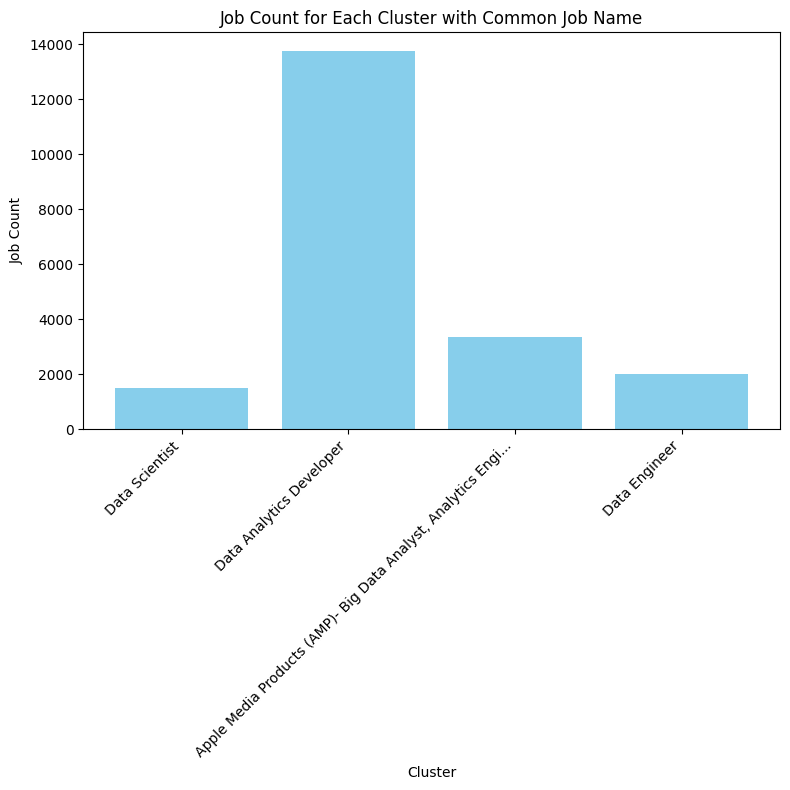

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store data for plotting
cluster_numbers = []
job_counts = []
common_job_names = []

# Iterate through each cluster
for cluster in range(k):
    # Filter data for the current cluster
    cluster_jobs = data[data['Cluster'] == cluster]
    job_count = len(cluster_jobs)

    # Get the most common job name
    common_job_name = Counter(cluster_jobs['Role']).most_common(1)[0][0]

    # Append data to lists
    cluster_numbers.append(cluster)
    job_counts.append(job_count)
    common_job_names.append(common_job_name)

# Plotting
plt.figure(figsize=(8, 8))
plt.bar(cluster_numbers, job_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Job Count')
plt.title('Job Count for Each Cluster with Common Job Name')
plt.xticks(cluster_numbers, common_job_names, rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**TASK 2 : IDENTIFICATION OF THE SKILL SETS (HOMOGENEOUS)**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the cleaned data
cleaned_data = pd.read_csv("/content/Dataset/Datasets/bigdata_skills.csv")


In [ ]:
# Convert the skills into numerical data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
skills_tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['Skills'])

# Sum TF-IDF values across all documents (jobs) for each term (skill)
total_tfidf = skills_tfidf_matrix.sum(axis=0)

# Get the feature names (skills) corresponding to the TF-IDF values
feature_names = tfidf_vectorizer.get_feature_names_out()

# Flatten the total_tfidf array
total_tfidf = total_tfidf.A.flatten()

In [ ]:
# Create a DataFrame to associate feature names with their total TF-IDF values
skills_tfidf_df = pd.DataFrame(total_tfidf, index=feature_names, columns=['Total_TFIDF'])

# Remove common words from the output
common_words_to_remove = ['data', 'engineering', 'computer', 'science', 'learning', 'intelligence','big', 'anaytics', 'business', 'consulting']  # Add more words as needed
skills_tfidf_df = skills_tfidf_df[~skills_tfidf_df.index.isin(common_words_to_remove)]

# Sort the DataFrame by total TF-IDF values in descending order
common_skills_df = skills_tfidf_df.sort_values(by='Total_TFIDF', ascending=False)

In [ ]:
# Print the top common skills
print("Top Common Skills Across All Jobs:")
print(common_skills_df.head(50))  # Adjust the number as needed

Top Common Skills Across All Jobs:
               Total_TFIDF
aws             343.278867
azure           340.678289
analytics       305.422236
architecture    304.257629
agile           296.965420
sql             287.527299
management      284.543247
analysis        284.036099
machine         268.751303
python          255.599907
quality         188.157942
spark           162.481841
cloud           153.318388
visualization   152.654372
apis            152.427264
excel           149.935074
hadoop          147.440574
etl             145.896568
pipelines       142.038164
airflow         139.871622
modeling        139.383275
scala           138.919460
mining          137.662229
testing         134.129878
analytical      133.553541
gcp             125.915922
deep            120.853872
databricks      119.156323
warehousing     118.338727
bi              114.064627
bigquery        108.738630
development     106.862943
power           105.073086
finance         101.003317
research        100.

**TASK 3 : COMPETENCY OF SKILLS BY JOB FAMILY**

In [ ]:
!pip install bertopic

In [ ]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Dataset/Datasets/bigdata_skills.csv")
df['Job_Role'].fillna('', inplace=True)

#  'Job_Role' contains the job titles
documents = df['Job_Role'].tolist()

In [ ]:
# Convert the job roles into numerical data using TF-IDF
#tfidf_vectorizer = TfidfVectorizer(stop_words='english')
#job_role_tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [ ]:

# Apply BERTopic for job role clustering
topic_model = BERTopic()
job_role_clusters, job_role_topics = topic_model.fit_transform(documents)

# Assign job role clusters back to the dataframe
df['Job_Role_Cluster'] = job_role_clusters

In [ ]:
topic_model.get_topic_info()

Topic  Count                                            Name  \
0       -1    768             -1_intelligence_ai_management_spark   
1        0    820               0_engineer_data_melbourne_network   
2        1    337       1_senior_engineer_discovertinsights_p3949   
3        2    307                   2_scientist_rider_level_entry   
4        3    173                 3_analyst_cochesnet_dea_ratings   
..     ...    ...                                             ...   
179    178     11                       178_coredata_ii_optum_iii   
180    179     11            179_insight_success_regional_loyalty   
181    180     11                      180_talend_etlbig_sr_india   
182    181     11  181_imaging_geophysicist_laboratory_diagnostic   
183    182     11          182_engineersr_cleaning_asm_pipelining   

                                        Representation  \
0    [intelligence, ai, management, spark, finance,...   
1    [engineer, data, melbourne, network, acvmax, f...   
2    [senior, engineer, discovertinsights, p3949, t...   
3    [scientist, rider, level, entry, decisions, te...   
4    [analyst, cochesnet, dea, ratings, speaker, gr...   
..                                                 ...   
179  [coredata, ii, optum, iii, iv, analyst, data, ...   
180  [insight, success, regional, loyalty, customer...   
181  [talend, etlbig, sr, india, developer, big, co...   
182  [imaging, geophysicist, laboratory, diagnostic...   
183  [engineersr, cleaning, asm, pipelining, career...   

                                   Representative_Docs  
0    [Program Manager, Operations Finance Business ...  
1        [Data Engineer, Data Engineer, Data Engineer]  
2    [Senior Data Engineer, Senior Data Engineer, S...  
3     [Data Scientist, Data Scientist, Data Scientist]  
4           [Data Analyst, Data Analyst, Data Analyst]  
..                                                 ...  
179  [Data Analyst II, Data Analyst II, Data Analys...  
180  [Senior Insight Analyst, Insight Analyst, Insi...  
181  [Sr. Talend Data Engineer, Talend Big Data Eng...  
182  [Graduate Imaging Geophysicist, Imaging Geophy...  
183  [Careers | Data Engineer / Sr. Data Engineer, ...  

[184 rows x 5 columns]

In [ ]:
topic_model.get_topic(3)

[('analyst', 0.06975358116870313),
 ('cochesnet', 0.03404714977373629),
 ('dea', 0.020140059589230284),
 ('ratings', 0.020140059589230284),
 ('speaker', 0.017023574886868145),
 ('graduate', 0.01576897515751435),
 ('london', 0.015223040472259497),
 ('trainee', 0.012993494112167572),
 ('gtm', 0.011642096876961976),
 ('oslobased', 0.011642096876961976)]

In [ ]:

# Find the most common job role within each cluster
most_common_job_roles = df.groupby('Job_Role_Cluster')['Job_Role'].apply(lambda x: x.mode().iloc[0])

# Display each cluster along with its most common job role and competence terms
for job_role_cluster in most_common_job_roles.index:
    cluster_data = df[df['Job_Role_Cluster'] == job_role_cluster]
    most_common_job_role = most_common_job_roles[job_role_cluster]
    competence_terms = ', '.join(cluster_data['Skills'])

    print(f"Cluster {job_role_cluster}:")
    print(f"Most Common Job Role: {most_common_job_role}")
    print(f"Competence Terms: {competence_terms}")
    print("\n")

In [ ]:
# Sort clusters by size and select the top 20
top_clusters = df['Job_Role_Cluster'].value_counts().head(20).index

# Display information for the top 20 clusters
for job_role_cluster in top_clusters:
    cluster_data = df[df['Job_Role_Cluster'] == job_role_cluster]
    most_common_job_role = cluster_data['Job_Role'].mode().iloc[0]
    competence_terms = ', '.join(cluster_data['Skills'])

    print(f"Cluster {job_role_cluster}:")
    print(f"Most Common Job Role: {most_common_job_role}")
    print(f"Competence Terms: {competence_terms}")
    print("\n")

In [ ]:
import matplotlib.pyplot as plt

df['Skills'] = df['Skills'].fillna('').astype(str)

# Sort clusters by size and select the top 20
top_clusters = df['Job_Role_Cluster'].value_counts().head(20).index

# Set the number of competence terms to display
top_n_terms = 7

# Set up the subplots
num_cols = 2  # Number of subplots per row
num_rows = (len(top_clusters) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Display information for the top 20 clusters
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

for idx, job_role_cluster in enumerate(top_clusters):
    cluster_data = df[df['Job_Role_Cluster'] == job_role_cluster]
    most_common_job_role = cluster_data['Job_Role'].mode().iloc[0]

    # Get the top competence terms
    competence_terms_counts = cluster_data['Skills'].str.split(',').explode().str.strip().value_counts().head(top_n_terms)

    # Plot bar chart in the corresponding subplot
    ax = axes[idx // num_cols, idx % num_cols]
    competence_terms_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax)
    ax.set_title(f"Cluster {job_role_cluster}: {most_common_job_role}")
    ax.set_xlabel("Competence Terms")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
topic_model.visualize_topics()

In [ ]:
import plotly.express as px

company_job_counts = df['Company'].value_counts().reset_index()
company_job_counts.columns = ['Company', 'Job Openings']

# Sort by the number of job openings in descending order
company_job_counts = company_job_counts.sort_values(by='Job Openings', ascending=False)

# Create a bar chart
fig = px.bar(company_job_counts.head(10),
             x='Company',
             y='Job Openings',
             title='Top 10 Companies by Job Openings',
             labels={'Job Openings': 'Number of Job Openings'},
             color='Job Openings')

# Customize the layout
fig.update_layout(xaxis_title='Company', yaxis_title='Number of Job Openings')

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'Company' is the column containing company names
# Replace 'Company' with your actual column name
company_job_counts = df['Location'].value_counts().reset_index()
company_job_counts.columns = ['Location', 'Job Openings']

# Sort by the number of job openings in descending order
company_job_counts = company_job_counts.sort_values(by='Job Openings', ascending=False)

# Create a bar chart
fig = px.bar(company_job_counts.head(10),
             x='Location',
             y='Job Openings',
             title='Top 10 Locations by Job Openings',
             labels={'Job Openings': 'Number of Job Openings'},
             color='Job Openings')

# Customize the layout
fig.update_layout(xaxis_title='Company', yaxis_title='Number of Job Openings', height=800)  # Adjust the height as needed

# Show the plot
fig.show()


In [ ]:
# Group by 'Location' and 'Role' to get the count of each combination
location_role_counts = data.groupby(['Location', 'Role']).size().reset_index(name='Job Count')

# Sort by the number of job postings in descending order
location_role_counts = location_role_counts.sort_values(by='Job Count', ascending=False)

# Create a bar chart for the top 10 locations and associated roles
fig = px.bar(location_role_counts.head(10),
             x='Location',
             y='Job Count',
             color='Role',
             title='Top 10 Locations with the Highest Number of Job Postings and Associated Roles',
             labels={'Job Count': 'Number of Job Postings'},
             template='plotly', height=600)

# Customize the layout
fig.update_layout(xaxis_title='Location', yaxis_title='Number of Job Postings')

# Show the plot
fig.show()